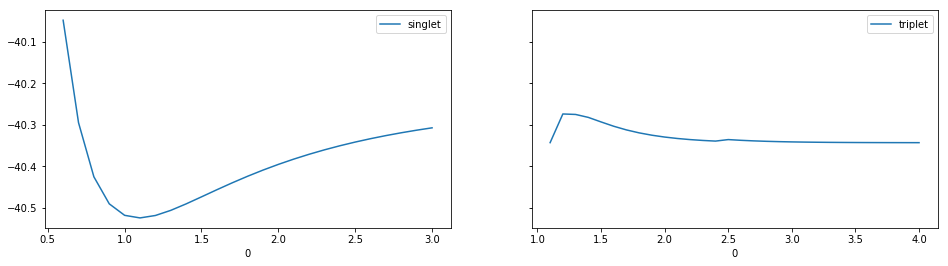

interactive(children=(IntSlider(value=0, description='mol_id', max=54), Output()), _dom_classes=('widget-interact',))

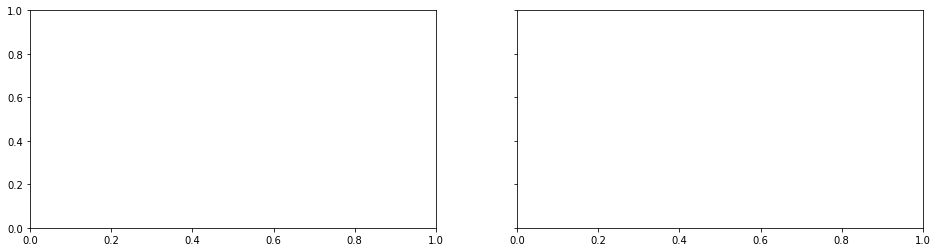

interactive(children=(IntSlider(value=0, description='mol_id', max=8), Output()), _dom_classes=('widget-interact',))

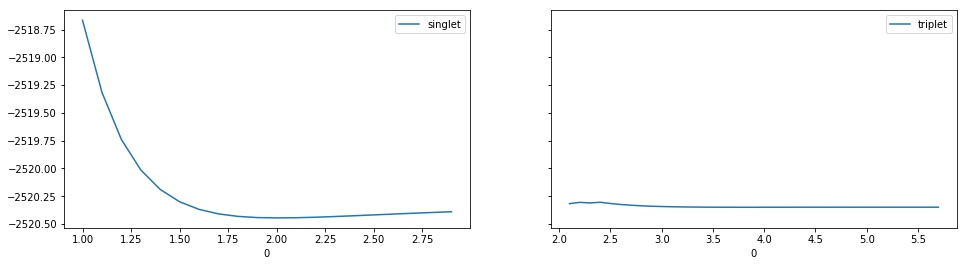

interactive(children=(IntSlider(value=0, description='mol_id', max=56), Output()), _dom_classes=('widget-interact',))

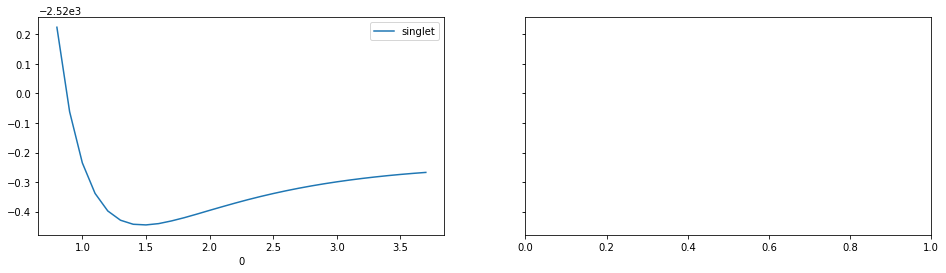

interactive(children=(IntSlider(value=0, description='mol_id', max=29), Output()), _dom_classes=('widget-interact',))

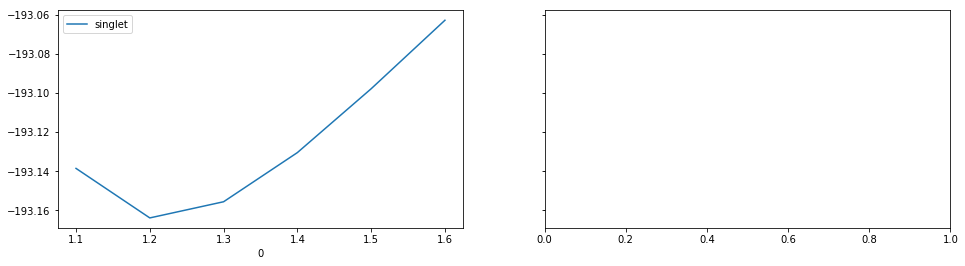

interactive(children=(IntSlider(value=0, description='mol_id', max=5), Output()), _dom_classes=('widget-interact',))

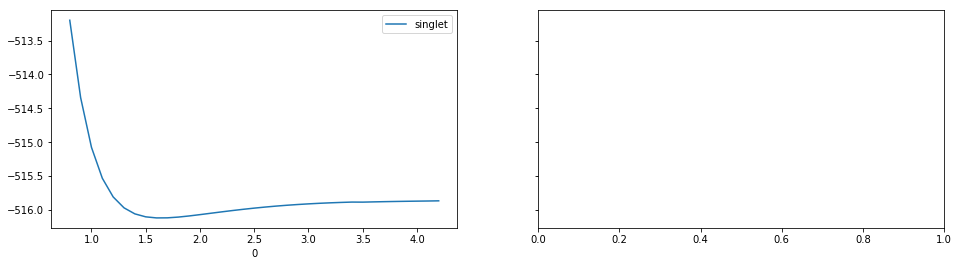

interactive(children=(IntSlider(value=0, description='mol_id', max=34), Output()), _dom_classes=('widget-interact',))

num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Iodine/03/I_2_4.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Iodine/03/I_1_3.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Iodine/04/I_2_5.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Iodine/02/I_3.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Iodine/01/I_2.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Chlorine/03/Cl_2_3.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Chlorine/04/CH3CH2CHCl2.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Chlorine/02/Cl_center.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/halogens/Chlorine/01/Cl_terminal.xyz.data


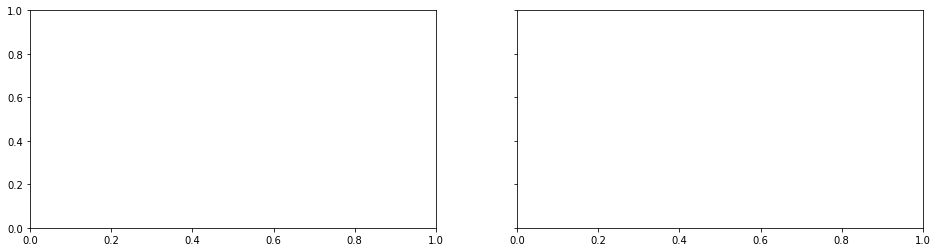

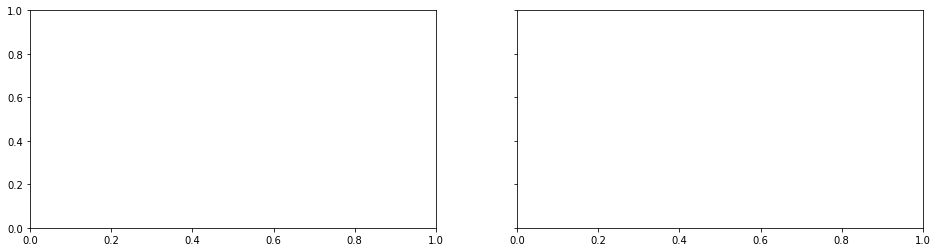

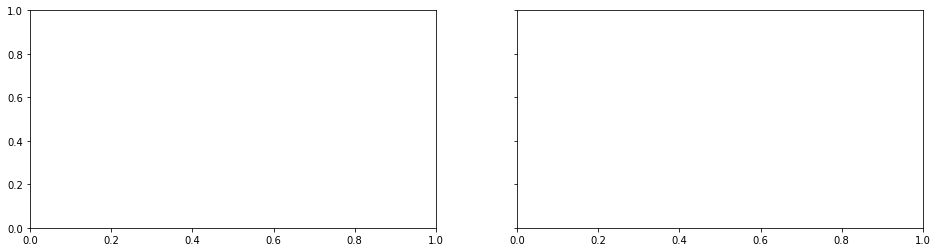

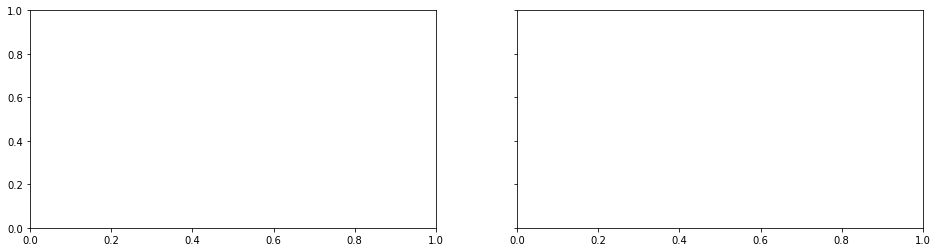

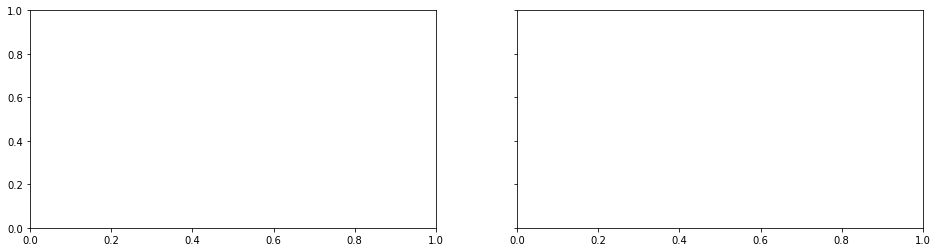

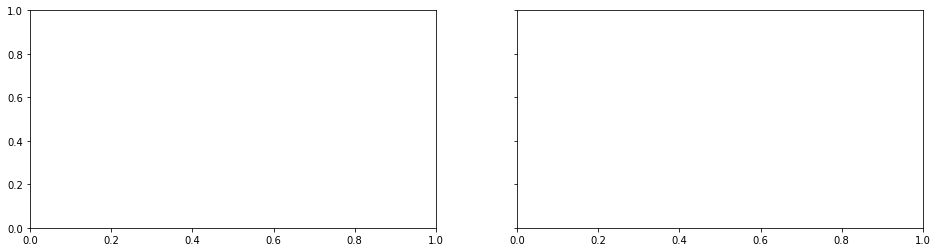

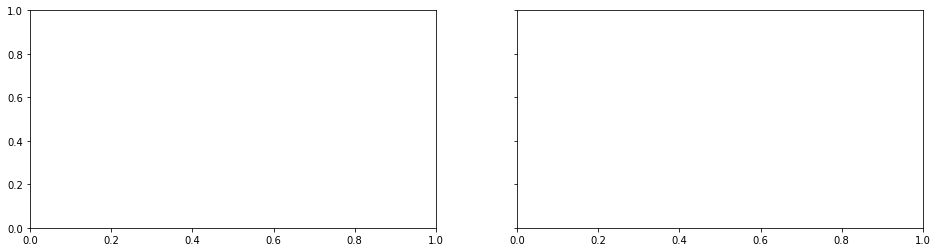

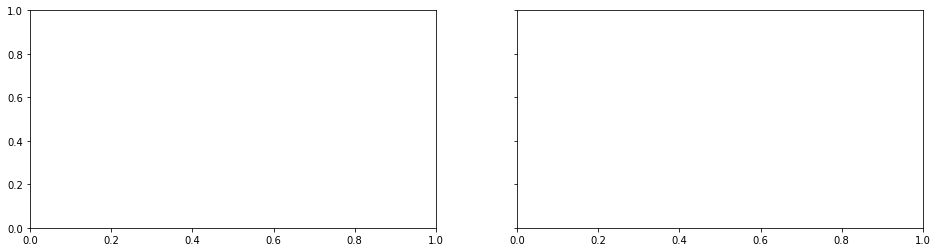

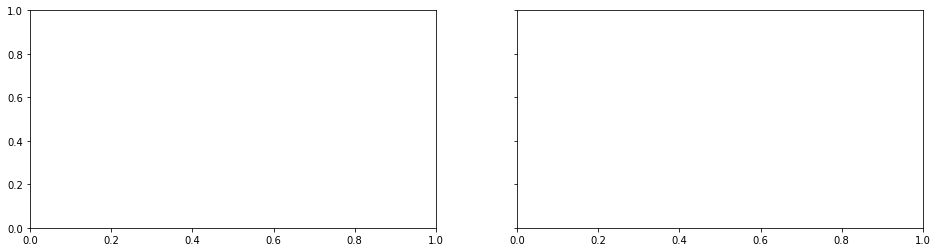

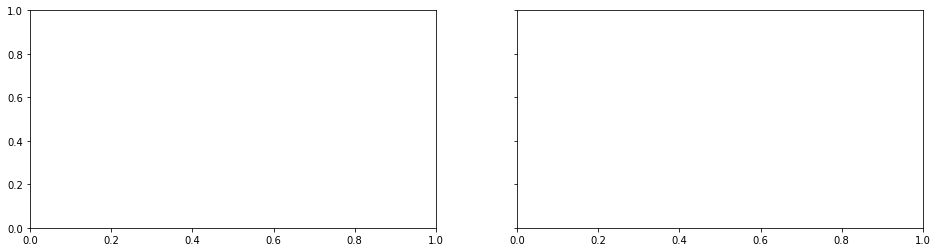

interactive(children=(IntSlider(value=0, description='mol_id', max=18), Output()), _dom_classes=('widget-interact',))

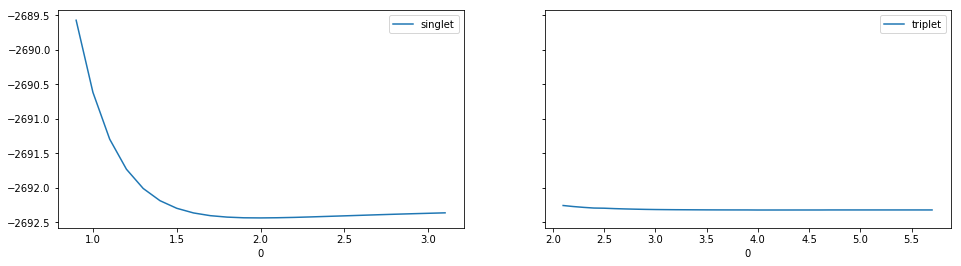

interactive(children=(IntSlider(value=0, description='mol_id', max=59), Output()), _dom_classes=('widget-interact',))

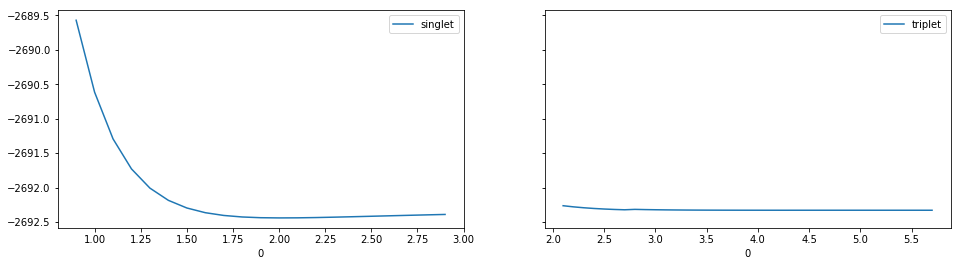

interactive(children=(IntSlider(value=0, description='mol_id', max=57), Output()), _dom_classes=('widget-interact',))

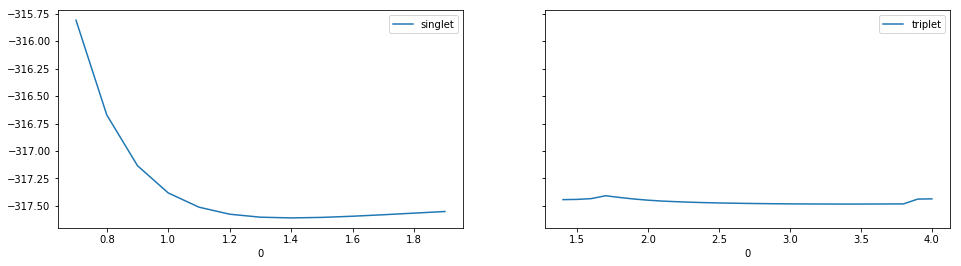

interactive(children=(IntSlider(value=0, description='mol_id', max=39), Output()), _dom_classes=('widget-interact',))

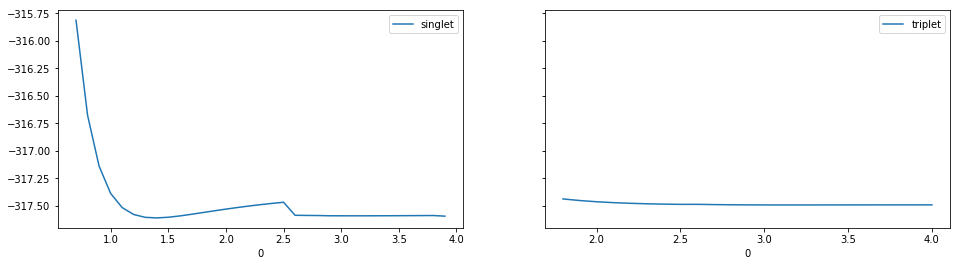

interactive(children=(IntSlider(value=0, description='mol_id', max=55), Output()), _dom_classes=('widget-interact',))

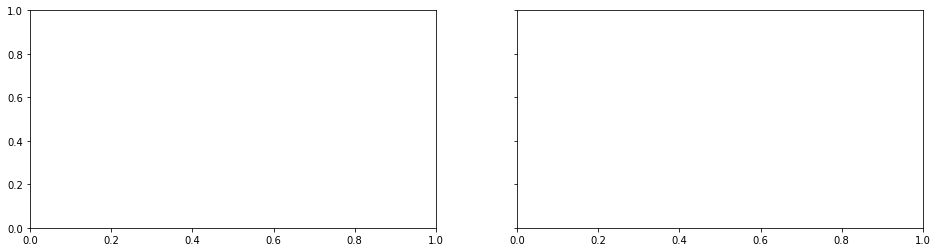

interactive(children=(IntSlider(value=0, description='mol_id', max=12), Output()), _dom_classes=('widget-interact',))

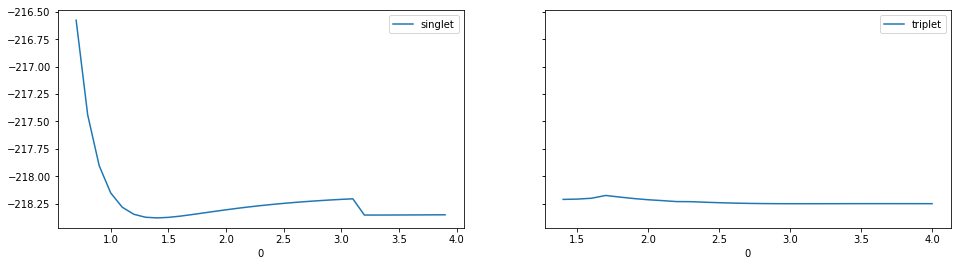

interactive(children=(IntSlider(value=0, description='mol_id', max=59), Output()), _dom_classes=('widget-interact',))

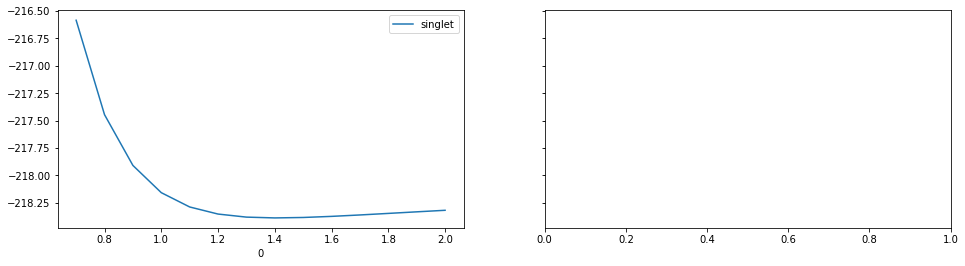

interactive(children=(IntSlider(value=0, description='mol_id', max=13), Output()), _dom_classes=('widget-interact',))

num_frames is 0 in ./pescan/xyz/qchem_clusters/hydroxy/03/OH_2_3.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/hydroxy/04/OH_1_3.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/hydroxy/02/OH_3.xyz.data
num_frames is 0 in ./pescan/xyz/qchem_clusters/hydroxy/01/OH_2.xyz.data


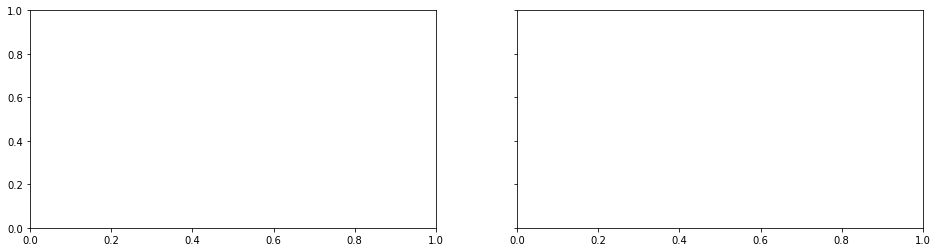

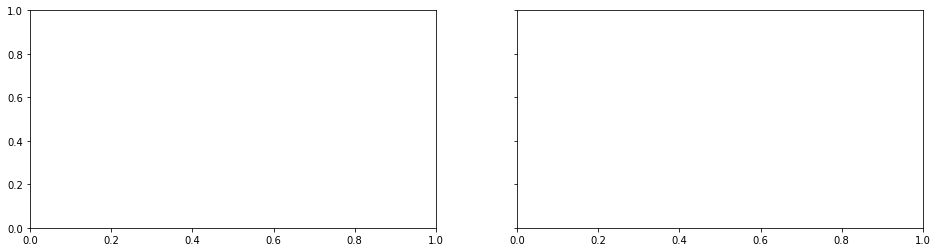

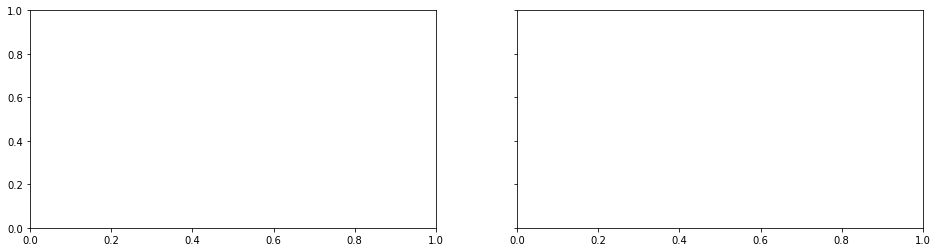

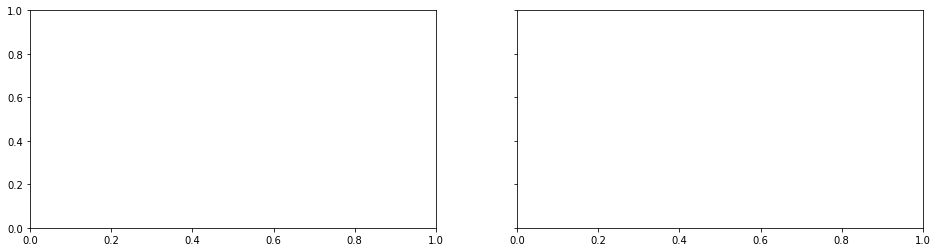

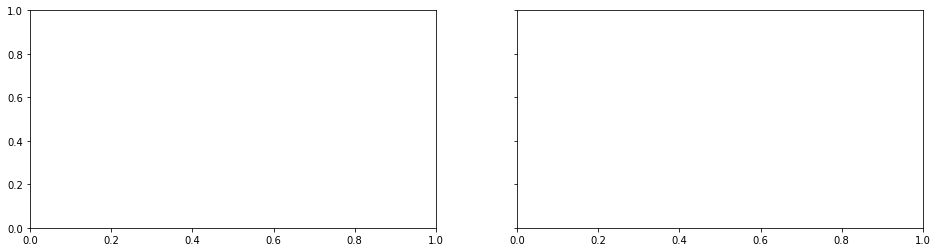

interactive(children=(IntSlider(value=0, description='mol_id', max=38), Output()), _dom_classes=('widget-interact',))

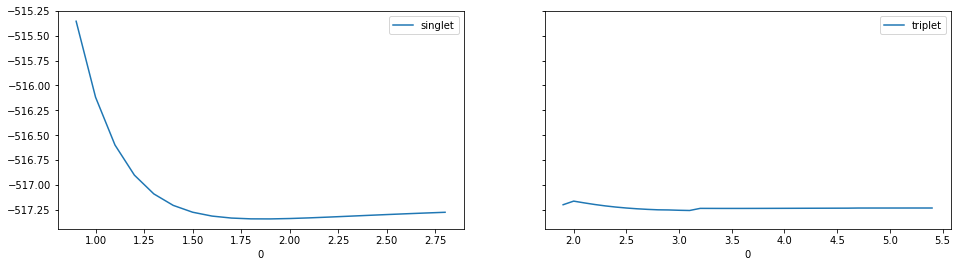

interactive(children=(IntSlider(value=0, description='mol_id', max=55), Output()), _dom_classes=('widget-interact',))

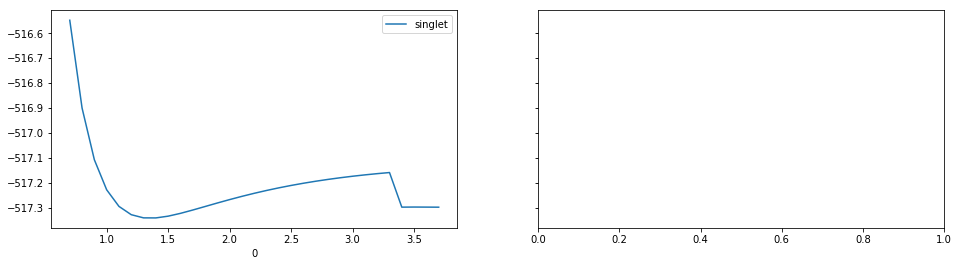

interactive(children=(IntSlider(value=0, description='mol_id', max=30), Output()), _dom_classes=('widget-interact',))

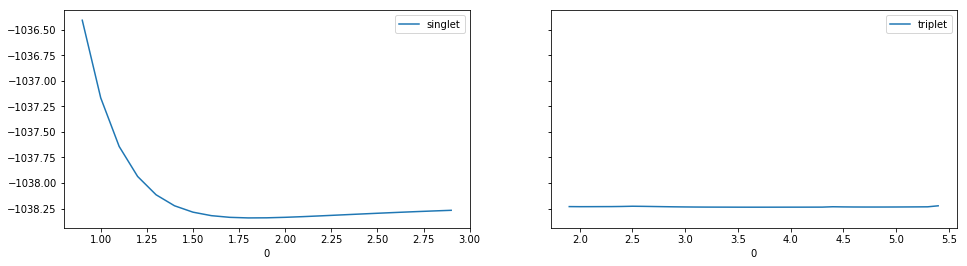

interactive(children=(IntSlider(value=0, description='mol_id', max=56), Output()), _dom_classes=('widget-interact',))

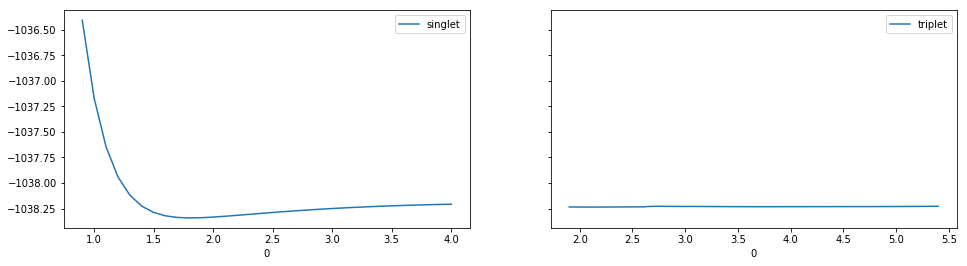

interactive(children=(IntSlider(value=0, description='mol_id', max=67), Output()), _dom_classes=('widget-interact',))

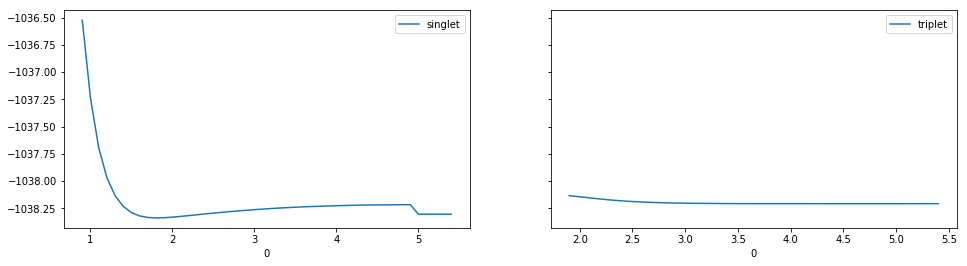

interactive(children=(IntSlider(value=0, description='mol_id', max=81), Output()), _dom_classes=('widget-interact',))

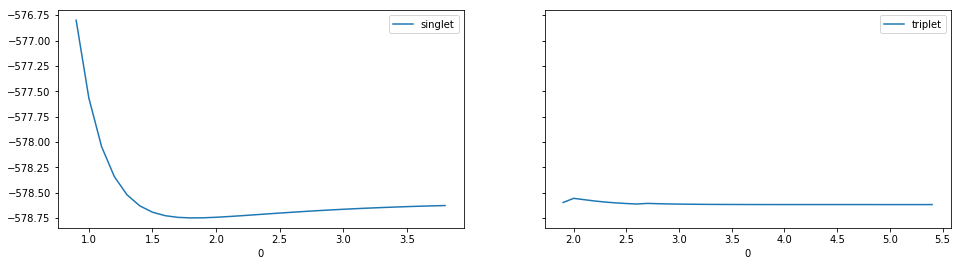

interactive(children=(IntSlider(value=0, description='mol_id', max=65), Output()), _dom_classes=('widget-interact',))

In [4]:
import os
import py3Dmol
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

def get_xyz(file_path):
    xyz = ''
    with open(file_path,'r') as fin:
        for line in fin:
            xyz += line
    return xyz

def get_xyzlist(data_path):    
    xyzlist = []
    for root, dirs, files in os.walk(data_path):
        for filename in files:
            if filename.endswith(".xyz"):
                filepath = os.path.join(root, filename)
                xyzlist.append(filepath)
    xyzlist.sort()
    return xyzlist

def plot_molecule(mol_id, xyzfiles, datapath):
    xyz_path = xyzfiles[mol_id]
    print('Dir : {}'.format(datapath))
    print('XYZ : {}'.format(os.path.basename(xyz_path)))
    xyz = get_xyz(xyz_path)
    xyzview = py3Dmol.view(width=400,height=400)
    xyzview.addModel(xyz,'xyz')
    xyzview.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})
    xyzview.zoomTo()
    xyzview.show()

ROOTDIR='./pescan'
for root, dirs, files in os.walk(ROOTDIR, topdown=True):
    for d in dirs:
        if '.xyz.data' in d:
            datapath = os.path.join(root,d)
            singlet_datapath = datapath+'/singlet.dat'
            triplet_datapath = datapath+'/triplet.dat'

            has_singlet = os.path.isfile(singlet_datapath)
            has_triplet = os.path.isfile(triplet_datapath)
          
            fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(16,4))
            if has_singlet:
                try:
                    singlet = pd.read_csv(singlet_datapath, header=None, delimiter=r"\s+")
                    singlet.plot(x=0, y=1, label='singlet', ax=ax1)
                except:
                    pass
                
            if has_triplet:
                try:
                    triplet = pd.read_csv(triplet_datapath, header=None, delimiter=r"\s+")
                    triplet.plot(x=0, y=1, label='triplet', ax=ax2)
                except:
                    pass
            
            xyzfiles = get_xyzlist(datapath)
            num_frames = len(xyzfiles)
            if num_frames > 0:
                widgets.interact(plot_molecule,\
                    mol_id = widgets.IntSlider(min=0,max=num_frames-1,step=1,value=0), \
                    xyzfiles = widgets.fixed(xyzfiles), \
                    datapath = widgets.fixed(datapath))
            else:
                print('num_frames is 0 in {}'.format(datapath))
